In [76]:
import pandas as pd
import numpy as np
import requests
import re
from selenium import webdriver
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [17]:
# Define category URLs
category_urls = {
    
    "Speakers":"https://www.flipkart.com/audio-video/speakers/pr?sid=0pm%2C0o7&otracker=categorytree&p%5B%5D=facets.features%255B%255D%3DBluetooth&otracker=nmenu_sub_Electronics_0_Bluetooth%20Speakers",
    "Sandwich Makers":"https://www.flipkart.com/sandwich-makers/pr?sid=j9e%2Cm38%2C1vj&otracker=nmenu_sub_Appliances_0_Sandwich%20Makers&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Sandwich%20Makers",
    "Irons":"https://www.flipkart.com/home-kitchen/home-appliances/irons/pr?sid=j9e,abm,a0u&p[]=facets.brand%255B%255D%3DPHILIPS&otracker=categorytree",
    "Air Coolers":"https://www.flipkart.com/home-kitchen/home-appliances/air-coolers/pr?sid=j9e,abm,52j&otracker=categorytree&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Air%20Coolers",
    "Electric Jug(heater)/Travel Kettles":"https://www.flipkart.com/electric-jugheatertravel-kettles/pr?sid=j9e%2Cm38%2Cxrv&otracker=nmenu_sub_Appliances_0_Electric%20Kettle&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Electric%20Kettle",
    "Puzzles And Cubes":"https://www.flipkart.com/toys/puzzles/pr?sid=mgl%2Clu4&otracker=nmenu_sub_Baby%20%26%20Kids_0_Puzzles",
    "Sofas":"https://www.flipkart.com/furniture/sofas/pr?sid=wwe,c3z&otracker=nmenu_sub_Home%20%26%20Furniture_0_Sofa",
    "Paintings":"https://www.flipkart.com/home-decor/paintings-posters/paintings/pr?sid=arb,bga,mmf&otracker=nmenu_sub_Home%20%26%20Furniture_0_Paintings",
    "Diaries":"https://www.flipkart.com/pens-stationery/office-supplies/diaries/pr?sid=dgv,tkw,mwh&otracker=product_breadCrumbs_Diaries&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Diaries",
    "Fitness Kits":"https://www.flipkart.com/exercise-fitness/fitness-equipments/fitness-kits/pr?sid=qoc,amf,vh3&p[]=facets.serviceability%5B%5D%3Dtrue&otracker=categorytree&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Home%20Gyms",
    "Fragrances":"https://www.flipkart.com/beauty-and-grooming/fragrances/pr?sid=g9b%2C0yh&p%5B%5D=facets.ideal_for%255B%255D%3DWomen&otracker=categorytree&p%5B%5D=facets.ideal_for%255B%255D%3DMen%2B%2526%2BWomen&p%5B%5D=facets.serviceability%5B%5D%3Dtrue&otracker=nmenu_sub_Women_0_Deodorants%20%26%20Perfumes",
    
    
}


In [18]:
product_data = []

# Loop through each category URL
for category, url in category_urls.items():
    print(f"Scraping category: {category}...")

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find all product listings
    products = soup.find_all("div", class_="slAVV4")

    for product in products:
        name = product.find("a", class_="wjcEIp")  # Product Name
        price = product.find("div", class_="Nx9bqj")  # Price
        rating = product.find("div", class_="XQDdHH")  # Rating
        reviews = product.find("span", class_="Wphh3N")  # Number of Reviews

        if name and price:
            product_data.append({
                "Category": category,
                "Product Name": name.text,
                "Price": price.text.replace("₹", "").replace(",", ""),
                "Rating": rating.text if rating else "No Rating",
                 "Number of Reviews": reviews.text.replace("(", "").replace(")", "") if reviews else "No Reviews"
            })



Scraping category: Speakers...
Scraping category: Sandwich Makers...
Scraping category: Irons...
Scraping category: Air Coolers...
Scraping category: Electric Jug(heater)/Travel Kettles...
Scraping category: Puzzles And Cubes...
Scraping category: Sofas...
Scraping category: Paintings...
Scraping category: Diaries...
Scraping category: Fitness Kits...
Scraping category: Fragrances...


In [19]:
# Convert to DataFrame
df = pd.DataFrame(product_data)
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
1,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
2,Speakers,F FERONS Wireless rechargeable portable Premiu...,419,3.9,"1,82,540"
3,Speakers,Nu Republic Soundbar 20 Upto 12 hrs Playtime w...,799,4.1,"3,374"
4,Speakers,FITRIC M3 (PORTABLE BLUETOOTH MINI SPEAKER) Dy...,297,3.9,"2,808"
...,...,...,...,...,...
435,Fragrances,KILLER WAVE DEO Deodorant Spray - For Men & ...,269,No Rating,No Reviews
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219,4,585
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378,4,"8,671"
438,Fragrances,RAMSONS Once More Deodorant Spray - For Men ...,204,4.3,"2,699"


In [20]:
df.to_csv("flipkart_products.csv", index=False)
print("Scraping Completed! Data saved to flipkart_products.csv")

Scraping Completed! Data saved to flipkart_products.csv


#EDA

In [21]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
1,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
2,Speakers,F FERONS Wireless rechargeable portable Premiu...,419,3.9,"1,82,540"
3,Speakers,Nu Republic Soundbar 20 Upto 12 hrs Playtime w...,799,4.1,"3,374"
4,Speakers,FITRIC M3 (PORTABLE BLUETOOTH MINI SPEAKER) Dy...,297,3.9,"2,808"
...,...,...,...,...,...
435,Fragrances,KILLER WAVE DEO Deodorant Spray - For Men & ...,269,No Rating,No Reviews
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219,4,585
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378,4,"8,671"
438,Fragrances,RAMSONS Once More Deodorant Spray - For Men ...,204,4.3,"2,699"


In [22]:
df.columns

Index(['Category', 'Product Name', 'Price', 'Rating', 'Number of Reviews'], dtype='object')

In [23]:
df.head()

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
1,Speakers,HOUSE OF SOUND HOS 9 W Bluetooth Speaker,400,3.8,397
2,Speakers,F FERONS Wireless rechargeable portable Premiu...,419,3.9,"1,82,540"
3,Speakers,Nu Republic Soundbar 20 Upto 12 hrs Playtime w...,799,4.1,"3,374"
4,Speakers,FITRIC M3 (PORTABLE BLUETOOTH MINI SPEAKER) Dy...,297,3.9,"2,808"


In [24]:
df.tail()

,Category,Product Name,Price,Rating,Number of Reviews
435,Fragrances,KILLER WAVE DEO Deodorant Spray - For Men & ...,269,No Rating,No Reviews
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219,4,585
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378,4,"8,671"
438,Fragrances,RAMSONS Once More Deodorant Spray - For Men ...,204,4.3,"2,699"
439,Fragrances,quimper Chocolate Musk Pure Spray Perfume - ...,159,4,541


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           440 non-null    object
 1   Product Name       440 non-null    object
 2   Price              440 non-null    object
 3   Rating             440 non-null    object
 4   Number of Reviews  440 non-null    object
dtypes: object(5)
memory usage: 17.3+ KB


In [26]:
df.describe()

,Category,Product Name,Price,Rating,Number of Reviews
count,440,440,440,440,440
unique,11,418,305,21,327
top,Speakers,Mimikry To Do List 120 gsm Hard Cover | 3.25 x...,999,4.2,No Reviews
freq,40,5,12,71,37


In [27]:
df.nunique()

Category              11
Product Name         418
Price                305
Rating                21
Number of Reviews    327
dtype: int64

In [28]:
df.duplicated

<bound method DataFrame.duplicated of        Category                                       Product Name Price  \
0      Speakers           HOUSE OF SOUND HOS 9 W Bluetooth Speaker   400   
1      Speakers           HOUSE OF SOUND HOS 9 W Bluetooth Speaker   400   
2      Speakers  F FERONS Wireless rechargeable portable Premiu...   419   
3      Speakers  Nu Republic Soundbar 20 Upto 12 hrs Playtime w...   799   
4      Speakers  FITRIC M3 (PORTABLE BLUETOOTH MINI SPEAKER) Dy...   297   
..          ...                                                ...   ...   
435  Fragrances  KILLER WAVE DEO Deodorant Spray  -  For Men & ...   269   
436  Fragrances  Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...   219   
437  Fragrances  La French Oud Gift Set Adventure Oud Romance O...   378   
438  Fragrances  RAMSONS Once More Deodorant Spray  -  For Men ...   204   
439  Fragrances  quimper Chocolate Musk Pure Spray Perfume  -  ...   159   

        Rating Number of Reviews  
0          3.8

In [29]:
print(df.duplicated().sum())

11


In [30]:
df.drop_duplicates(inplace=True)

In [31]:
print(df.duplicated().sum())

0


In [32]:
df.isnull()

,Category,Product Name,Price,Rating,Number of Reviews
0,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
435,False,False,False,False,False
436,False,False,False,False,False
437,False,False,False,False,False
438,False,False,False,False,False


In [33]:
df.isnull().sum()

Category             0
Product Name         0
Price                0
Rating               0
Number of Reviews    0
dtype: int64

In [34]:
# Remove currency symbols and commas, then convert to float
df["Price"] = df["Price"].astype(str).str.replace("[₹,]", "", regex=True).astype(float)

In [35]:
print(df["Rating"].unique())  # Check unique values in the Rating column

['3.8' '3.9' '4.1' '4.2' '3.7' '4.3' '3.5' '4.6' '4' '3.6' 'No Rating'
 '4.4' '3.4' '4.5' '2.7' '4.8' '4.7' '2.9' '3.1' '3.3' '5']


In [36]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")  # Convert to numeric, replacing non-numeric values with NaN

In [37]:
print(df["Rating"].unique())

[3.8 3.9 4.1 4.2 3.7 4.3 3.5 4.6 4.  3.6 nan 4.4 3.4 4.5 2.7 4.8 4.7 2.9
 3.1 3.3 5. ]


In [38]:
df["Product Name"] = df["Product Name"].str.title()  # Capitalize first letter of each word

In [39]:
df["Number of Reviews"] = pd.to_numeric(df["Number of Reviews"].astype(str).str.replace(",", ""), errors="coerce") 

In [40]:
df["Number of Reviews"].fillna(0, inplace=True)  # Replace NaN with 0

In [41]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [42]:
df.Category.unique()

array(['Speakers', 'Sandwich Makers', 'Irons', 'Air Coolers',
       'Electric Jug(heater)/Travel Kettles', 'Puzzles And Cubes',
       'Sofas', 'Paintings', 'Diaries', 'Fitness Kits', 'Fragrances'],
      dtype=object)

In [43]:
df.groupby(["Rating"]).count()

,Category,Product Name,Price,Number of Reviews
Rating,,,,
2.7,1,1,1,1
2.9,1,1,1,1
3.1,1,1,1,1
3.3,1,1,1,1
3.4,3,3,3,3
3.5,3,3,3,3
3.6,14,14,14,14
3.7,10,10,10,10
3.8,27,27,27,27


In [44]:
Ratingstar=df.groupby(['Rating']).size().reset_index(name='count').rename(columns={'Rating':'Rating_Star'})

In [45]:
Ratingstar

,Rating_Star,count
0,2.7,1
1,2.9,1
2,3.1,1
3,3.3,1
4,3.4,3
5,3.5,3
6,3.6,14
7,3.7,10
8,3.8,27
9,3.9,35


In [46]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


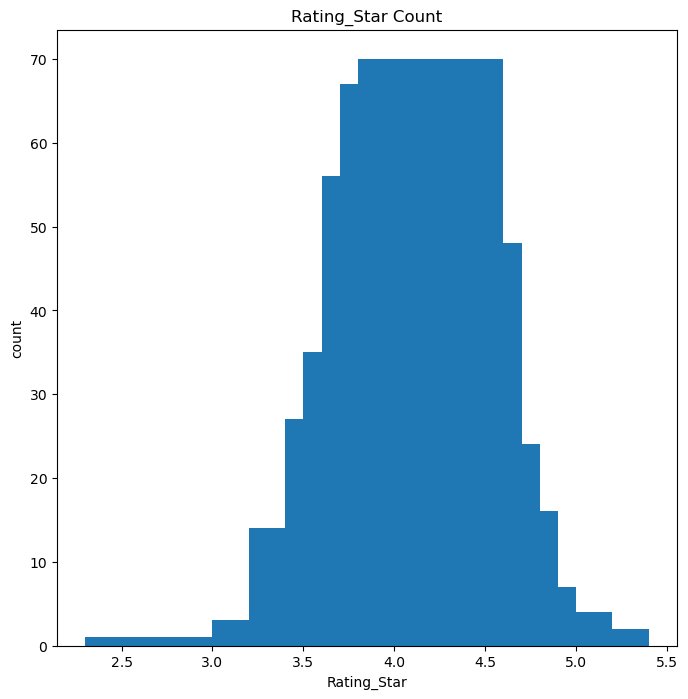

In [47]:
plt.figure(figsize=(8,8))
plt.bar(Ratingstar['Rating_Star'],Ratingstar['count'])
plt.title('Rating_Star Count')
plt.xlabel('Rating_Star')
plt.ylabel('count')
plt.show()

In [48]:
df.groupby(['Price']).count()

,Category,Product Name,Rating,Number of Reviews
Price,,,,
71.0,1,1,1,1
85.0,1,1,1,1
109.0,1,1,1,1
110.0,1,1,1,1
113.0,1,1,1,1
...,...,...,...,...
23790.0,1,1,1,1
29499.0,1,1,1,1
29999.0,1,1,1,1


In [49]:
g=df.groupby(['Price']).size().reset_index(name='count').rename(columns={'Price':'price'})

In [50]:
g

,price,count
0,71.0,1
1,85.0,1
2,109.0,1
3,110.0,1
4,113.0,1
...,...,...
300,23790.0,1
301,29499.0,1
302,29999.0,1
303,30239.0,1


Text(0, 0.5, 'count')

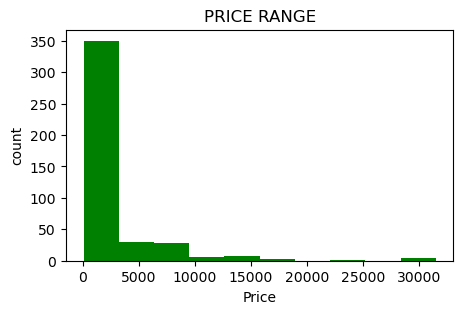

In [51]:
plt.figure(figsize=(5,3))
x=df['Price']
plt.hist(x,bins=10,color='Green')
plt.title('PRICE RANGE')
plt.xlabel('Price')     
plt.ylabel('count')

<Axes: >

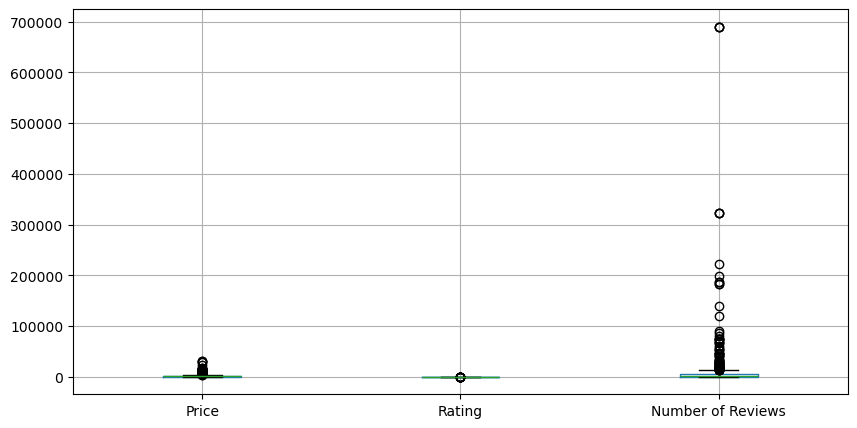

In [52]:
plt.figure(figsize=(10,5))
df.boxplot()

In [53]:
df.dtypes

Category              object
Product Name          object
Price                float64
Rating               float64
Number of Reviews    float64
dtype: object

In [54]:
from scipy import stats

#Zscore

In [55]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [56]:

# Compute Z-score
df["g"] = stats.zscore(df["Price"])

# Remove rows where Z-score is greater than 3 (very extreme values)
df = df[df["g"].abs() <= 3]

# Drop the extra column
df.drop(columns=["g"], inplace=True)


C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\3283023841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["g"], inplace=True)


In [57]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


<Axes: >

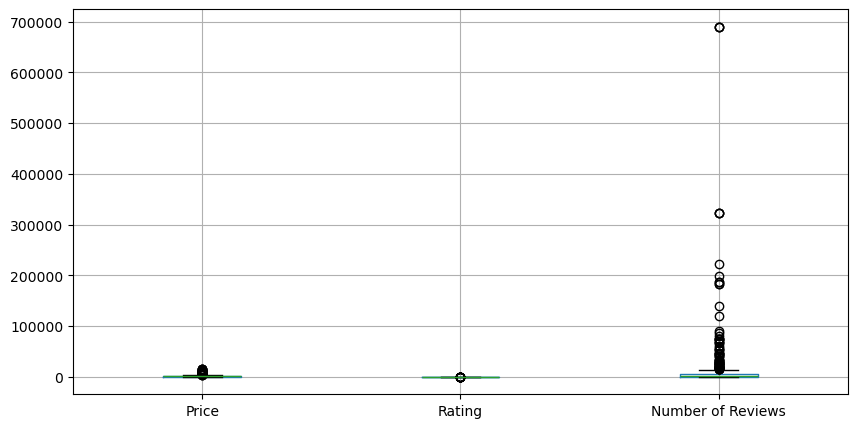

In [58]:
plt.figure(figsize=(10,5))
df.boxplot()

#Bivariate analysis


In [59]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [60]:
df.shape

(421, 5)

In [61]:
df.head()

,Category,Product Name,Price,Rating,Number of Reviews
0,Speakers,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,Speakers,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,Speakers,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,Speakers,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,Speakers,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0


In [62]:
df.tail()

,Category,Product Name,Price,Rating,Number of Reviews
435,Fragrances,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,Fragrances,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,Fragrances,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,Fragrances,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0
439,Fragrances,Quimper Chocolate Musk Pure Spray Perfume - ...,159.0,4.0,541.0


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\1970178525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = le.fit_transform(df["Category"])


In [65]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,10,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,10,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,10,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,10,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,10,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,4,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,4,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,4,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,4,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [66]:
df_corr = df.select_dtypes(include=["number"]).corr()
print(df_corr)

                   Category     Price    Rating  Number of Reviews
Category           1.000000 -0.145034 -0.112406          -0.071323
Price             -0.145034  1.000000 -0.111124          -0.062279
Rating            -0.112406 -0.111124  1.000000           0.027981
Number of Reviews -0.071323 -0.062279  0.027981           1.000000


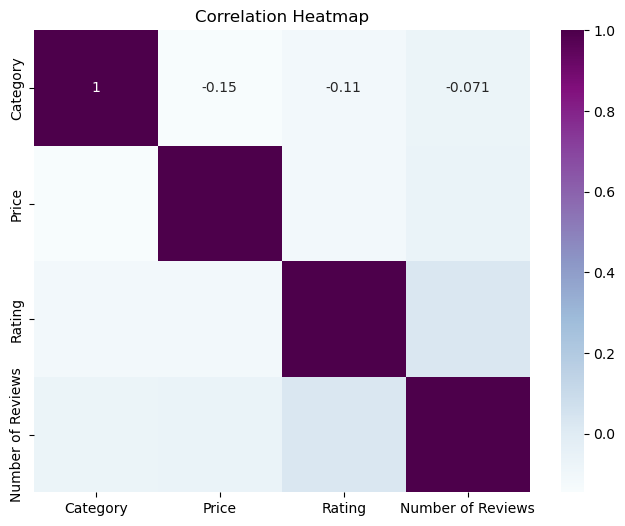

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\GENUINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GENUINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GENUINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GENUINE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

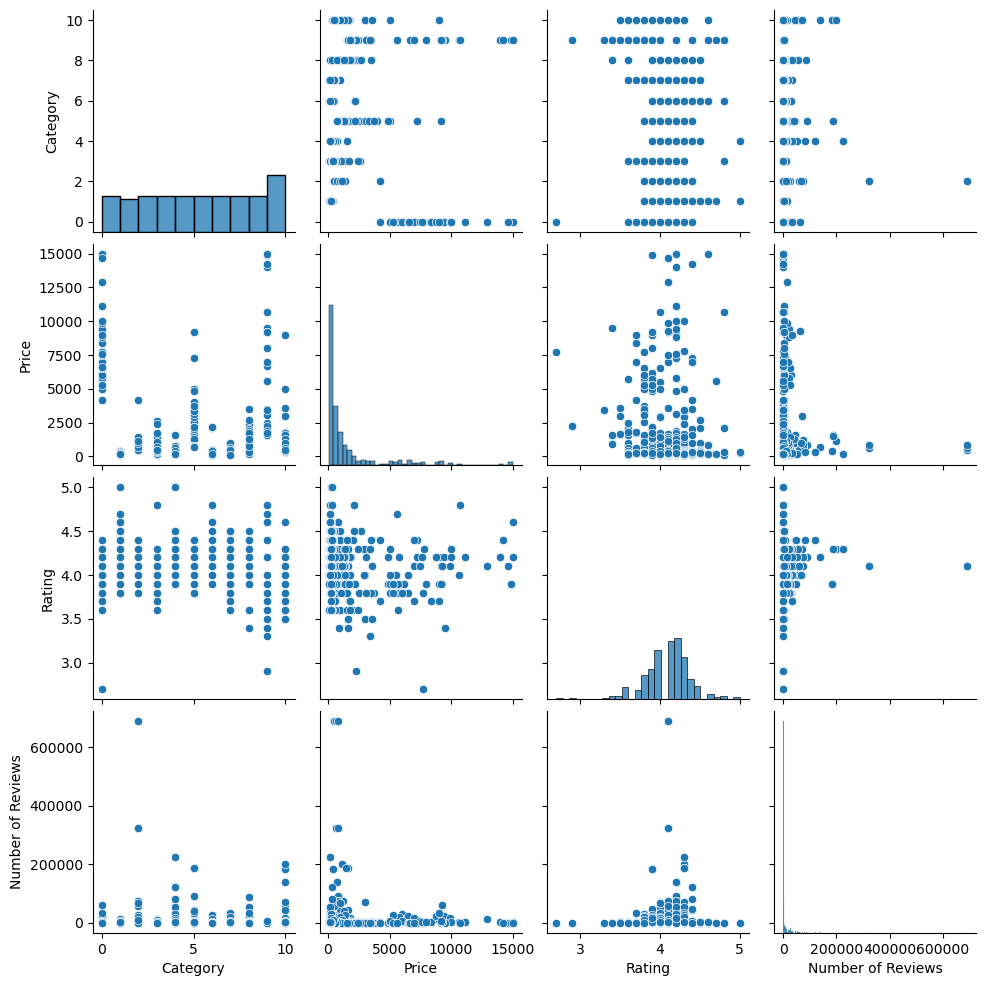

In [68]:
sns.pairplot(df)

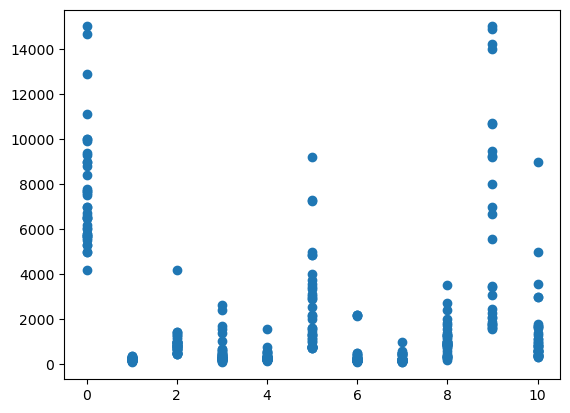

In [70]:
plt.scatter(df['Category'],df['Price'])

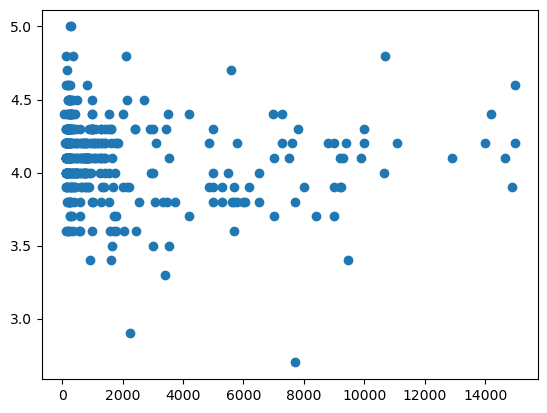

In [71]:
plt.scatter(df['Price'],df['Rating'])

In [72]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,10,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,10,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,10,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,10,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,10,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,4,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,4,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,4,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,4,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


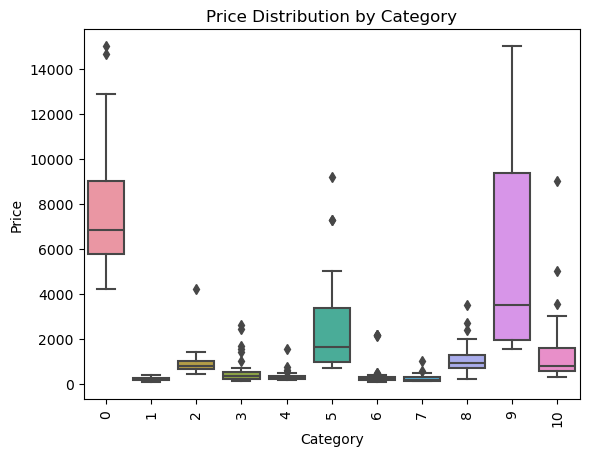

In [73]:
sns.boxplot(x="Category", y="Price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Category")
plt.show()

In [74]:
anova_result = stats.f_oneway(*(df[df["Category"] == cat]["Price"] 
    for cat in df["Category"].unique()))
print("ANOVA Test Result (Price by Category):", anova_result)


ANOVA Test Result (Price by Category): F_onewayResult(statistic=83.89473123769879, pvalue=1.0712122961369127e-92)


###Storing Cleaned Data in a Relational Database Using SQLAlchemy


In [79]:
from sqlalchemy import create_engine
from pymysql import connect

In [78]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------------------------- ------------ 30.7/45.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
a=connect(host='localhost',user='root',password='243012@saran')
cur=a.cursor()
query='show databases'
cur.execute(query)
a=cur.fetchall()
for i in a:
    print(i)

#unsupervised learning

In [83]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,10,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,10,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,10,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,10,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,10,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,4,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,4,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,4,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,4,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [84]:
X = df[["Price", "Rating", "Number of Reviews"]]

In [85]:
X

,Price,Rating,Number of Reviews
0,400.0,3.8,397.0
2,419.0,3.9,182540.0
3,799.0,4.1,3374.0
4,297.0,3.9,2808.0
5,8999.0,4.2,9513.0
...,...,...,...
435,269.0,NaN,0.0
436,219.0,4.0,585.0
437,378.0,4.0,8671.0
438,204.0,4.3,2699.0


In [86]:
df

,Category,Product Name,Price,Rating,Number of Reviews
0,10,House Of Sound Hos 9 W Bluetooth Speaker,400.0,3.8,397.0
2,10,F Ferons Wireless Rechargeable Portable Premiu...,419.0,3.9,182540.0
3,10,Nu Republic Soundbar 20 Upto 12 Hrs Playtime W...,799.0,4.1,3374.0
4,10,Fitric M3 (Portable Bluetooth Mini Speaker) Dy...,297.0,3.9,2808.0
5,10,"Mivi Fort H350 Soundbar, 350 Watts, 5.1 Channe...",8999.0,4.2,9513.0
...,...,...,...,...,...
435,4,Killer Wave Deo Deodorant Spray - For Men & ...,269.0,NaN,0.0
436,4,Al-Nuaim Chocolate Musk |Alcohol Free |Deodora...,219.0,4.0,585.0
437,4,La French Oud Gift Set Adventure Oud Romance O...,378.0,4.0,8671.0
438,4,Ramsons Once More Deodorant Spray - For Men ...,204.0,4.3,2699.0


In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
k_values = range(2, 11)  
silhouette_coefficients = []
k_values_list = []

In [92]:
import numpy as np
print(np.isnan(X_scaled).sum())

37


In [93]:
X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]

In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X_scaled = imputer.fit_transform(X_scaled)


In [95]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    silhouette_coefficient = silhouette_score(X_scaled, cluster_labels)
    silhouette_coefficients.append(silhouette_coefficient)
    k_values_list.append(k)


C:\Users\GENUINE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GENUINE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GENUINE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GENUINE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

In [96]:
print(f"K = {k}, Silhouette Coefficient = {silhouette_coefficient:.3f}")

K = 10, Silhouette Coefficient = 0.402


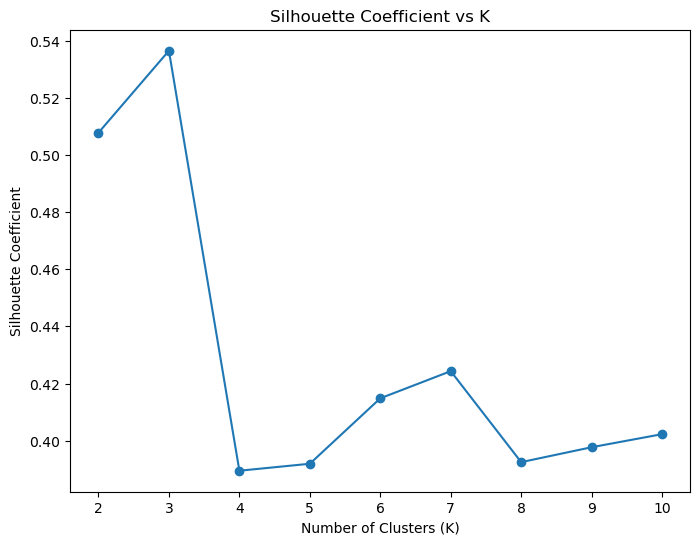

In [97]:
#  Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values_list, silhouette_coefficients, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient vs K")
plt.show()

In [98]:
#  Choose the optimal K
optimal_k = k_values_list[np.argmax(silhouette_coefficients)]
print(f"Optimal K value: {optimal_k}")

Optimal K value: 3


In [103]:
print(len(df), len(X_scaled))  # Should print the same number


421 384


In [105]:
print("df shape:", df.shape)
print("X_scaled shape:", X_scaled.shape)



df shape: (421, 5)
X_scaled shape: (384, 3)


In [109]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Remove NaN values properly without resetting the index
df_clean = df.dropna()
X_scaled_clean = X_scaled[~np.isnan(X_scaled).any(axis=1)]

# Step 2: Apply K-Means clustering with optimal_k
optimal_k = 3  # Change this based on your optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled_clean)

# Step 3: Assign the clusters back to the original df
df["Cluster"] = np.nan  # Initialize Cluster column
df.loc[df_clean.index, "Cluster"] = df_clean["Cluster"].reindex(df_clean.index)

# Step 4: Verify index consistency
print("Original df index:", df.index[:10])  
print("df_clean index:", df_clean.index[:10])
print(df["Cluster"].value_counts())  # Check cluster distribution


C:\Users\GENUINE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Original df index: Index([0, 2, 3, 4, 5, 6, 7, 8, 9, 11], dtype='int64')
df_clean index: Index([0, 2, 3, 4, 5, 6, 7, 8, 9, 11], dtype='int64')
Cluster
0.0    321
2.0     60
1.0      3
Name: count, dtype: int64


C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\677161801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Cluster"] = kmeans.fit_predict(X_scaled_clean)
C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\677161801.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"] = np.nan  # Initialize Cluster column


In [111]:
#  Apply K-Means with optimal K
#  Mapping clusters to categories
cluster_map = {i: f"Cluster_{i}" for i in range(optimal_k)}
df["Cluster_Label"] = df["Cluster"].map(cluster_map)


C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\2892862312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster_Label"] = df["Cluster"].map(cluster_map)


In [112]:
df.drop("Cluster", axis=1, inplace=True)

C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\365761142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Cluster", axis=1, inplace=True)


In [113]:

df.to_csv("clustered_flipkart_products.csv", index=False)

print(" Clustering completed! Data saved to 'clustered_flipkart_products.csv'.")

 Clustering completed! Data saved to 'clustered_flipkart_products.csv'.


C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\4105248058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"] = np.nan  # Initialize the column
C:\Users\GENUINE\AppData\Local\Temp\ipykernel_2524\4105248058.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["Cluster"] = df_plot["Cluster"].astype(int)


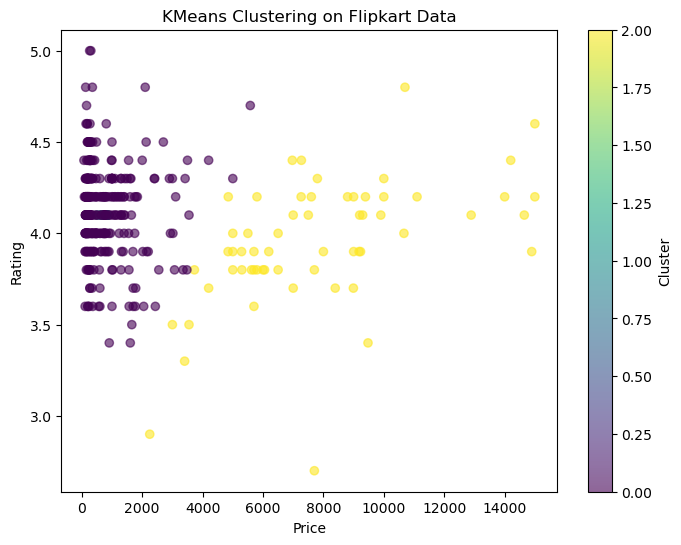

In [115]:
import matplotlib.pyplot as plt

# Ensure that the cluster labels align with the original dataframe
df["Cluster"] = np.nan  # Initialize the column
df.loc[df_clean.index, "Cluster"] = df_clean["Cluster"].reindex(df_clean.index)

# Drop NaN values in 'Cluster' to match 'Price' and 'Rating' length
df_plot = df.dropna(subset=["Cluster"])

# Convert cluster column to integers
df_plot["Cluster"] = df_plot["Cluster"].astype(int)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["Price"], df_plot["Rating"], c=df_plot["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("KMeans Clustering on Flipkart Data")
plt.colorbar(label="Cluster")
plt.show()

